In [90]:
import pandas as pd
import numpy as np

from dateutil.parser import parse
from datetime import datetime
import dateutil.parser

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import glob
import os
import zipfile

import timeit
import requests

from bs4 import BeautifulSoup
import re
import urllib
from bs4 import BeautifulSoup, element

import nltk

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm

## December

In [91]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/preorders/43436/USA/'

response = requests.get(url)

In [92]:
tables = pd.read_html(url)

In [93]:
# convert list object to a dataframe 
dec_df = pd.DataFrame(tables[0])

In [94]:
# Apply a function to format game title 
dec_df['Game'] = dec_df['Game'].apply(game_title)

In [95]:
dec_df['Game'] = dec_df['Game'].str.lower()

In [96]:
dec_df.columns = [x.lower() for x in dec_df.columns]

In [97]:
dec_filtered = dec_df.loc[dec_df['weeks to launch'] <=5]

In [98]:
dec_filtered = dec_filtered.dropna(subset=['total'])

In [99]:
dec_df = dec_filtered.groupby(['game'])['total'].sum().reset_index()


In [100]:
dec_df['game'] = dec_df['game'].replace(['super smash bros.'], 'super smash bros. ultimate')

In [101]:
twitch_nov = pd.read_csv("twitch_november")  

In [102]:
twitch_nov.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [103]:
twitch_nov = twitch_nov.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [104]:
twitch_nov['game'] = twitch_nov['game'].str.lower()

In [105]:
combined = pd.merge(dec_df, twitch_nov, on='game')

In [106]:
combined

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,just cause 4,60907,13200000,19800,57916,58,108,305,0,666.67
1,subnautica,15632,7669980,858720,4725,54,2342,177,19,8.93
2,super smash bros. ultimate,1440032,18280500,123060,15703,342,687,423,2,148.55


## November 

In [107]:
url = 'http://www.vgchartz.com/preorders/43408/USA/'

response = requests.get(url)

In [108]:
tables = pd.read_html(url)

In [109]:
# convert list object to a dataframe 
nov_df = pd.DataFrame(tables[0])

In [110]:
# Apply a function to format game title 
nov_df['Game'] = nov_df['Game'].apply(game_title)

In [111]:
nov_df['Game'] = nov_df['Game'].str.lower()

In [112]:
nov_df.columns = [x.lower() for x in nov_df.columns]

In [113]:
nov_filtered = nov_df.loc[nov_df['weeks to launch'] <=4]

In [114]:
nov_filtered = nov_filtered.dropna(subset=['total'])

In [115]:
nov_df = nov_filtered.groupby(['game'])['total'].sum().reset_index()


In [116]:
nov_df['game'] = nov_df['game'].replace(["pokemon: let's go, eevee!"], "pokemon: let's go, pikachu!/eevee!")

In [117]:
nov_df['game'] = nov_df['game'].replace(["pokemon: let's go, pikachu!"], "pokemon: let's go, pikachu!/eevee!")

In [118]:
nov_df = nov_filtered.groupby(['game'])['total'].sum().reset_index()


In [119]:
nov_df

,game,total
0,battlefield v,86769
1,bendy and the ink machine,38780
2,darksiders iii,79432
3,fallout 76,160681
4,fortnite,49047
5,hitman 2,24429
6,"pokémon: let's go, eevee!",93533
7,"pokémon: let's go, pikachu!",134430
8,spyro reignited trilogy,165475


In [120]:
twitch_oct = pd.read_csv("twitch_october")  

In [121]:
twitch_oct.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [122]:
twitch_oct = twitch_oct.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [123]:
twitch_oct['game'] = twitch_oct['game'].str.lower()

In [124]:
combined_oct = pd.merge(nov_df, twitch_oct, on='game')

In [125]:
combined_oct

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,fallout 76,160681,78005760,1573560,138444,3801,7162,1749,35,49.57
1,fortnite,49047,6727501200,398319000,591205,20952,822907,150908,8934,16.89


## October

In [126]:
url = 'http://www.vgchartz.com/preorders/43373/USA/'

response = requests.get(url)

In [127]:
tables = pd.read_html(url)

In [128]:
# convert list object to a dataframe 
oct_df = pd.DataFrame(tables[0])

In [129]:
# Apply a function to format game title 
oct_df['Game'] = oct_df['Game'].apply(game_title)

In [130]:
oct_df['Game'] = oct_df['Game'].str.lower()

In [131]:
oct_df.columns = [x.lower() for x in oct_df.columns]

In [133]:
oct_filtered = oct_df.loc[oct_df['weeks to launch'] <=5]

In [134]:
oct_filtered = oct_filtered.dropna(subset=['total'])

In [135]:
oct_df = oct_filtered.groupby(['game'])['total'].sum().reset_index()


In [137]:
oct_df['game'] = oct_df['game'].replace(["dark souls: remastered"], "dark souls")

In [160]:
oct_df = oct_filtered.groupby(['game'])['total'].sum().reset_index()


In [161]:
twitch_sept = pd.read_csv("twitch_september")  

In [162]:
twitch_sept.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [163]:
twitch_sept = twitch_sept.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [164]:
twitch_sept['game'] = twitch_sept['game'].str.lower()

In [165]:
combined_sept = pd.merge(oct_df, twitch_sept, on='game')

In [166]:
combined_sept

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,assassin's creed odyssey,66582,3365760,16620,10159,18,124,78,0,202.51
1,assassin's creed odyssey,66582,3365760,16620,10159,18,124,78,0,202.51
2,mega man 11,56805,4184460,55980,12315,30,703,96,1,74.75
3,mega man 11,56805,4184460,55980,12315,30,703,96,1,74.75
4,soulcalibur vi,39348,33097560,357060,32532,238,1577,767,8,92.69


## September

In [145]:
combined_ocurl = 'http://www.vgchartz.com/preorders/43345/USA/'

response = requests.get(url)

In [146]:
tables = pd.read_html(url)

In [147]:
# convert list object to a dataframe 
sept_df = pd.DataFrame(tables[0])

In [148]:
# Apply a function to format game title 
sept_df['Game'] = sept_df['Game'].apply(game_title)

In [149]:
sept_df['Game'] = sept_df['Game'].str.lower()

In [150]:
sept_df.columns = [x.lower() for x in sept_df.columns]

In [151]:
sept_filtered = sept_df.loc[sept_df['weeks to launch'] <=4]

In [152]:
sept_filtered = sept_filtered.dropna(subset=['total'])

In [153]:
sept_df = sept_filtered.groupby(['game'])['total'].sum().reset_index()


In [154]:
twitch_aug = pd.read_csv("twitch_august")  

In [155]:
twitch_aug.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [156]:
twitch_aug = twitch_aug.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [157]:
twitch_aug['game'] = twitch_aug['game'].str.lower()

In [158]:
combined_aug = pd.merge(sept_df, twitch_aug, on='game')

In [159]:
combined_aug

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,soulcalibur vi,39348,8669820,6420,23316,7,30,194,0,1350.44


## August

In [167]:
combined_ocurl = 'http://www.vgchartz.com/preorders/43317/USA/'

response = requests.get(url)

In [168]:
tables = pd.read_html(url)

In [169]:
# convert list object to a dataframe 
aug_df = pd.DataFrame(tables[0])

In [170]:
# Apply a function to format game title 
aug_df['Game'] = aug_df['Game'].apply(game_title)

In [171]:
aug_df['Game'] = aug_df['Game'].str.lower()

In [172]:
aug_df.columns = [x.lower() for x in aug_df.columns]

In [174]:
aug_filtered = aug_df.loc[aug_df['weeks to launch'] <=4]

In [175]:
aug_filtered = aug_filtered.dropna(subset=['total'])

In [176]:
aug_df = aug_filtered.groupby(['game'])['total'].sum().reset_index()


In [177]:
twitch_july = pd.read_csv("twitch_july")  

In [178]:
twitch_july.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [179]:
twitch_july = twitch_july.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [180]:
twitch_july['game'] = twitch_july['game'].str.lower()

In [181]:
combined_july = pd.merge(aug_df, twitch_july, on='game')

In [182]:
combined_july

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio


## July

In [184]:
combined_url = 'http://www.vgchartz.com/preorders/43289/USA/'

response = requests.get(url)

In [185]:
tables = pd.read_html(url)

In [188]:
# convert list object to a dataframe 
july_df = pd.DataFrame(tables[0])

In [189]:
july_df['Game'] = july_df['Game'].apply(game_title)

In [190]:
july_df['Game'] = july_df['Game'].str.lower()

In [191]:
july_df.columns = [x.lower() for x in july_df.columns]

In [192]:
july_filtered = july_df.loc[july_df['weeks to launch'] <=4]

In [193]:
july_filtered = july_filtered.dropna(subset=['total'])

In [194]:
july_df = july_filtered.groupby(['game'])['total'].sum().reset_index()


In [195]:
twitch_june = pd.read_csv("twitch_june")  

In [196]:
twitch_june.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [197]:
twitch_june = twitch_june.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [198]:
twitch_june['game'] = twitch_june['game'].str.lower()

In [199]:
combined_june = pd.merge(july_df, twitch_june, on='game')

In [200]:
combined_june

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,soulcalibur vi,39348,3773160,1380,14197,4,10,87,0,2734.17


In [207]:
df_2018 = pd.concat([combined_june, combined_july, combined_aug, combined_sept, combined_oct, combined_nov, combined], ignore_index=True) 

In [209]:
df_2018

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,soulcalibur vi,39348,3773160,1380,14197,4,10,87,0,2734.17
1,soulcalibur vi,39348,8669820,6420,23316,7,30,194,0,1350.44
2,assassin's creed odyssey,66582,3365760,16620,10159,18,124,78,0,202.51
3,assassin's creed odyssey,66582,3365760,16620,10159,18,124,78,0,202.51
4,mega man 11,56805,4184460,55980,12315,30,703,96,1,74.75
5,mega man 11,56805,4184460,55980,12315,30,703,96,1,74.75
6,soulcalibur vi,39348,33097560,357060,32532,238,1577,767,8,92.69
7,fallout 76,160681,78005760,1573560,138444,3801,7162,1749,35,49.57
8,fortnite,49047,6727501200,398319000,591205,20952,822907,150908,8934,16.89
9,battlefield v,86769,499377600,15136800,89149,1160,46471,11575,350,32.99


In [210]:
df_2018 = df_2018.drop([9, 13])

In [211]:
df_2018.corr()

,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
total,1.000000,-0.079065,-0.078079,-0.089671,-0.061846,-0.078413,-0.079080,-0.078123,-0.107452
watch_time,-0.079065,1.000000,0.999073,0.955709,0.977393,0.998671,0.999992,0.999167,-0.143094
stream_time,-0.078079,0.999073,1.000000,0.944978,0.971713,0.999917,0.998906,0.999996,-0.134657
peak_viewers,-0.089671,0.955709,0.944978,1.000000,0.987510,0.943681,0.956509,0.945599,-0.192369
peak_channels,-0.061846,0.977393,0.971713,0.987510,1.000000,0.970709,0.977855,0.972158,-0.183959
streamers,-0.078413,0.998671,0.999917,0.943681,0.970709,1.000000,0.998466,0.999885,-0.135732
average_viewers,-0.079080,0.999992,0.998906,0.956509,0.977855,0.998466,1.000000,0.999012,-0.143773
average_channels,-0.078123,0.999167,0.999996,0.945599,0.972158,0.999885,0.999012,1.000000,-0.135029
average_viewer_ratio,-0.107452,-0.143094,-0.134657,-0.192369,-0.183959,-0.135732,-0.143773,-0.135029,1.000000


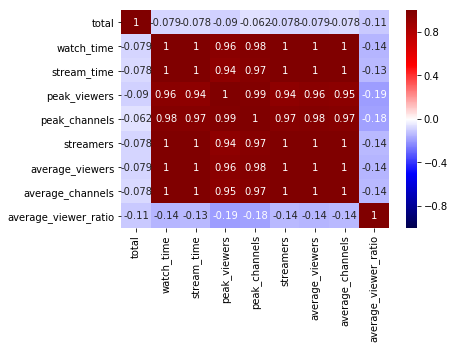

In [212]:
sns.heatmap(df_2018.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


In [214]:
# Define the model
lm1 = smf.ols('total ~ peak_viewers + peak_channels', data=df_2018)

# Fit the model
fit = lm1.fit()

# Print summary statistics of the model's performance
fit.summary()

/Users/nicksherwin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.101
Method:                 Least Squares   F-statistic:                    0.2672
Date:                Thu, 18 Jul 2019   Prob (F-statistic):              0.769
Time:                        14:38:34   Log-Likelihood:                -239.59
No. Observations:                  17   AIC:                             485.2
Df Residuals:                      14   BIC:                             487.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.275e+05   1.36e+05      1.679      0.115   -6.31e+04    5.18e+05
peak_viewers     -2.7050      3.909     -0.692      0.500     -11.089       5.679
peak_channels    70.4066    108.960      0.646      0.529    -163.288     304.102
==============================================================================
Omnibus:                       39.719   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.625
Skew:                           3.308   Prob(JB):                     8.56e-23
Kurtosis:                      12.985   Cond. No.                     2.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""